In [1]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

11493376/11490434 [==============================] - 12s 1us/step


In [3]:
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=5, batch_size=32)

loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)

print('loss_and_metrics : ' + str(loss_and_metrics))

Epoch 1/5
60000/60000 [==============================] - 8s 127us/step - loss: 0.6875 - acc: 0.8240
Epoch 2/5
60000/60000 [==============================] - 8s 129us/step - loss: 0.3497 - acc: 0.9027
Epoch 3/5
60000/60000 [==============================] - 8s 131us/step - loss: 0.3021 - acc: 0.9142
Epoch 4/5
60000/60000 [==============================] - 8s 130us/step - loss: 0.2736 - acc: 0.9226
Epoch 5/5
10000/10000 [==============================] - 1s 51us/step
loss_and_metrics : [0.23458893744051457, 0.93359999999999999]


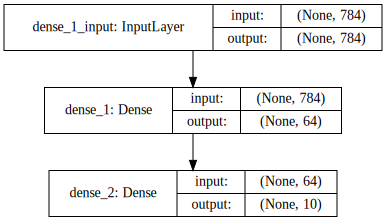

In [4]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [5]:
from keras.models import load_model

model.save('mnist_mlp_model.h5')
model = load_model('mnist_mlp_model.h5')